In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("dataset_assignment1.csv")
df

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
695,2,1,1,1,2,1,1,1,1,0
696,5,10,10,3,7,3,8,10,2,1
697,4,8,6,4,3,4,10,6,1,1
698,4,8,8,5,4,5,10,4,1,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   feature1  700 non-null    int64
 1   feature2  700 non-null    int64
 2   feature3  700 non-null    int64
 3   feature4  700 non-null    int64
 4   feature5  700 non-null    int64
 5   feature6  700 non-null    int64
 6   feature7  700 non-null    int64
 7   feature8  700 non-null    int64
 8   feature9  700 non-null    int64
 9   class     700 non-null    int64
dtypes: int64(10)
memory usage: 54.8 KB


0    459
1    241
Name: class, dtype: int64


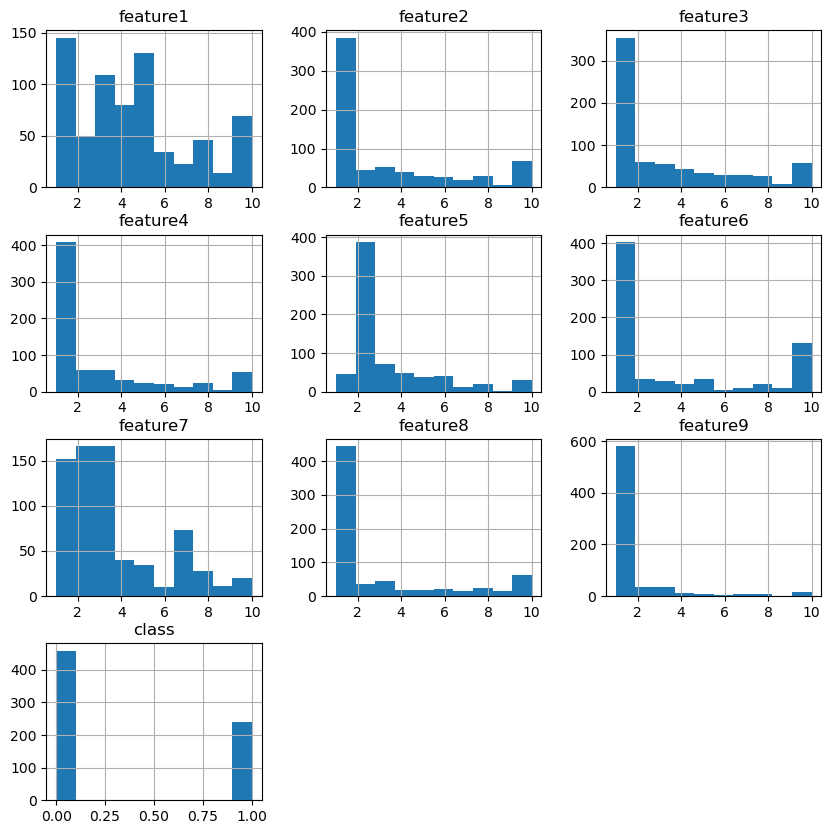

In [4]:
# print the number of samples for each class
print(df['class'].value_counts())

# plot a histogram for each feature
df.hist(figsize=(10, 10))
plt.show()

In [5]:
# statistical description of each feature in class 0
df[df['class'] == 0].describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,class
count,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.0
mean,2.956427,1.324619,1.442266,1.363834,2.119826,1.437908,2.102397,1.289760,1.063181,0.0
std,1.672490,0.906830,0.996960,0.995886,0.916145,1.310839,1.079976,1.057787,0.501456,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
25%,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.0
50%,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.0
75%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.0
max,8.000000,9.000000,8.000000,10.000000,10.000000,10.000000,7.000000,9.000000,8.000000,0.0


In [6]:
# statistical description of each feature in class 1
df[df['class'] == 1].describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,class
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.0
mean,7.195021,6.572614,6.560166,5.547718,5.298755,7.593361,5.979253,5.863071,2.589212,1.0
std,2.428849,2.719512,2.562045,3.210465,2.451606,3.129263,2.273852,3.350672,2.557939,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
25%,5.000000,4.000000,4.000000,3.000000,3.000000,5.000000,4.000000,3.000000,1.000000,1.0
50%,8.000000,6.000000,6.000000,5.000000,5.000000,10.000000,7.000000,6.000000,1.000000,1.0
75%,10.000000,10.000000,9.000000,8.000000,6.000000,10.000000,7.000000,10.000000,3.000000,1.0
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.0


In [7]:
# split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis=1), df['class'], test_size=0.2, random_state=0)

In [8]:
def plots(y_test, y_pred, model):
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_)
    disp.plot()
    plt.show()
    # assume y_true and y_pred are the true and predicted labels, respectively
    target_names = ['precision', 'recall', 'f1-score']
    report = pd.DataFrame(classification_report(y_test, y_pred_dt, output_dict=True)).T.to_dict()

    # extract scores for each metric and class
    class_0 = [report[name]['0'] for name in target_names]
    class_1 = [report[name]['1'] for name in target_names]

    # plot the scores as a bar graph
    fig = plt.subplots()
    x = np.arange(len(target_names))
    barWidth = 0.25
    # Set position of bar on X axis
    br1 = np.arange(len(target_names))
    br2 = [x + barWidth for x in br1]

    # Make the plot
    plt.bar(br1, class_0, color ='r', width = barWidth,
            edgecolor ='grey', label ='Class 0')
    plt.bar(br2, class_1, color ='b', width = barWidth,
            edgecolor ='grey', label ='Class 1')

    # Adding Xticks
    plt.xlabel('Metrics', fontweight ='bold', fontsize = 15)
    plt.ylabel('Scores', fontweight ='bold', fontsize = 15)
    plt.xticks([r + barWidth for r in range(len(target_names))],
            ['Precision', 'Recall', 'F1'])
    plt.legend()
    plt.show()
    return

In [9]:
scores= []

Decision Tree Best Parameters:  {'max_depth': 4, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.95      0.94      0.95        86
           1       0.91      0.93      0.92        54

    accuracy                           0.94       140
   macro avg       0.93      0.93      0.93       140
weighted avg       0.94      0.94      0.94       140

[[81  5]
 [ 4 50]]


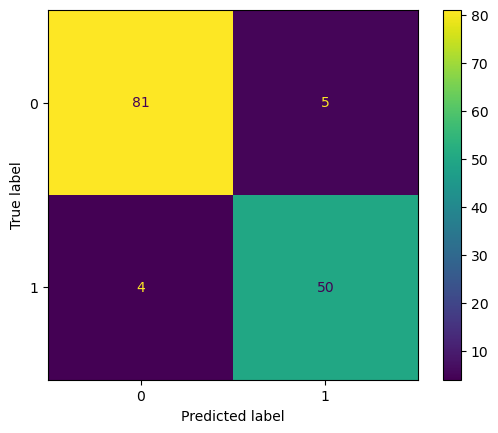

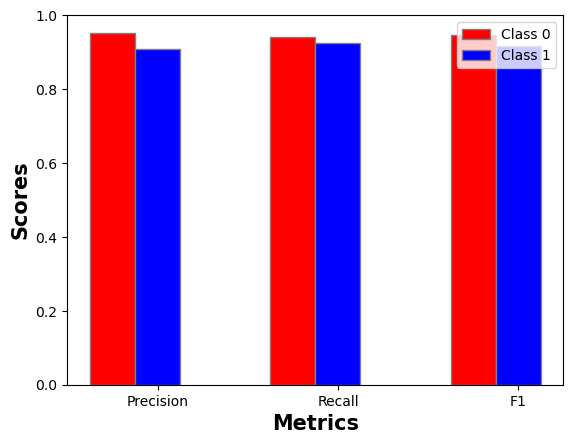

In [10]:
# Train a Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Perform K-Fold Cross Validation to find the best hyperparameters
grid_search = GridSearchCV(dt, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Decision Tree Best Parameters: ", grid_search.best_params_)

# Train the model with the best hyperparameters on the training data
dt = DecisionTreeClassifier(random_state=42, **grid_search.best_params_)
dt.fit(X_train, y_train)
# Evaluate the model on the validation data
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test,y_pred_dt))
scores.append({'Model':'Decision Trees', 
               'Precision':precision_score(y_test, y_pred_dt),
               'Recall':      recall_score(y_test, y_pred_dt),
               'Accuracy':  accuracy_score(y_test, y_pred_dt),
               'F1-Score':        f1_score(y_test, y_pred_dt)})
plots(y_test, y_pred_dt, grid_search)

Best Random Forest parameters:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        86
           1       0.91      0.94      0.93        54

    accuracy                           0.94       140
   macro avg       0.94      0.94      0.94       140
weighted avg       0.94      0.94      0.94       140

[[81  5]
 [ 3 51]]


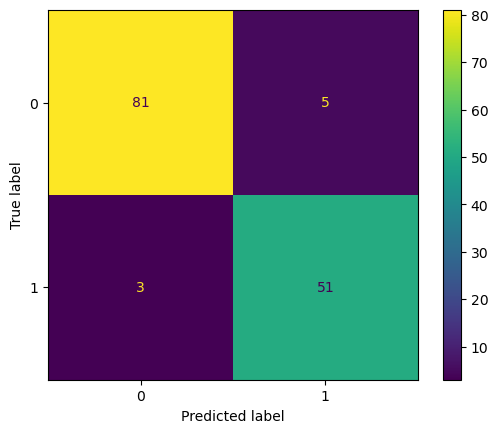

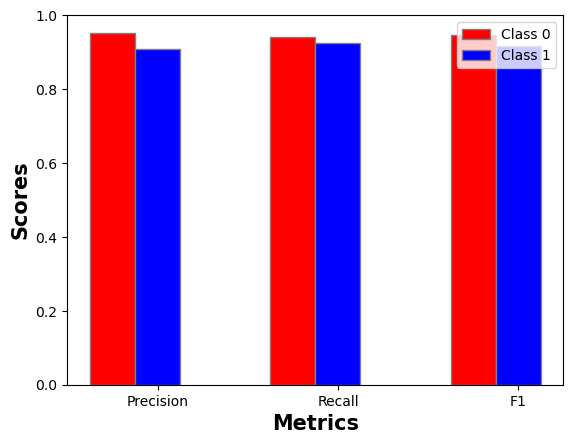

In [11]:
# create Random Forest model with default hyperparameters
rf_model = RandomForestClassifier()

# define hyperparameters for Random Forest model to tune
rf_params = {'n_estimators': [50, 100, 150],
             'max_features': ['sqrt', 'log2'],
             'max_depth': [None, 10, 20, 30, 40, 50],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4]}

# create GridSearchCV object for Random Forest model with 5-fold cross-validation
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='f1_weighted', n_jobs=-1)

# fit Random Forest model to training data
rf_grid.fit(X_train, y_train)

# print best hyperparameters and corresponding score
print("Best Random Forest parameters: ", rf_grid.best_params_)

# use best model to predict test data
y_pred_rf = rf_grid.best_estimator_.predict(X_test)

# evaluate performance of Random Forest model using multiple metrics
print(classification_report(y_test,y_pred_rf))
scores.append({'Model':'Random Forest', 
               'Precision':precision_score(y_test, y_pred_rf),
               'Recall':      recall_score(y_test, y_pred_rf),
               'Accuracy':  accuracy_score(y_test, y_pred_rf),
               'F1-Score':        f1_score(y_test, y_pred_rf)})
plots(y_test, y_pred_rf, rf_grid)

Best SVM parameters:  {'C': 1, 'degree': 2, 'kernel': 'rbf'}
Best SVM score:  0.9733574785006983
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        86
           1       0.91      0.96      0.94        54

    accuracy                           0.95       140
   macro avg       0.94      0.95      0.95       140
weighted avg       0.95      0.95      0.95       140

[[81  5]
 [ 2 52]]


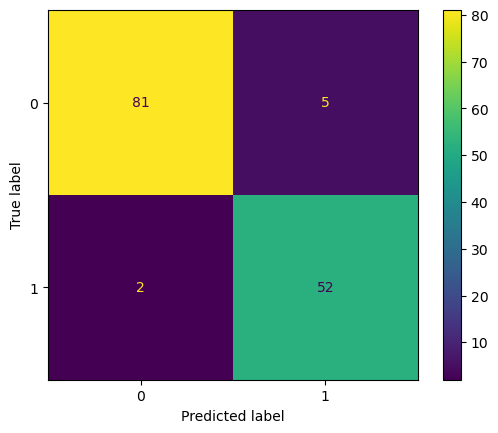

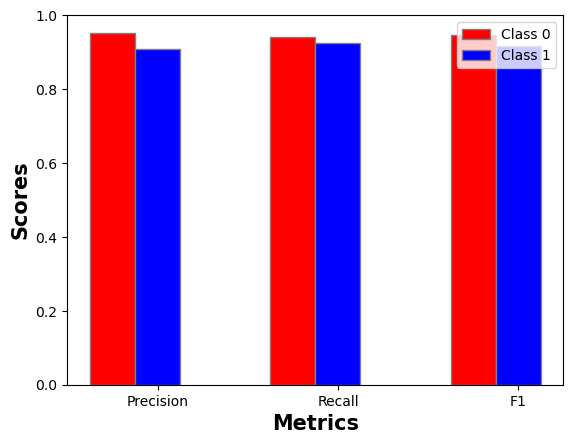

In [12]:
# create SVM model with default hyperparameters
svm_model = SVC()

# define hyperparameters for SVM model to tune
svm_params = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'degree': [2, 3, 4, 5]}

# create GridSearchCV object for SVM model with 5-fold cross-validation
svm_grid = GridSearchCV(svm_model, svm_params, cv=5, scoring='f1_weighted', n_jobs=-1)

# fit SVM model to training data
svm_grid.fit(X_train, y_train)

# print best hyperparameters and corresponding score
print("Best SVM parameters: ", svm_grid.best_params_)
print("Best SVM score: ", svm_grid.best_score_)

# use best model to predict test data
y_pred_svm = svm_grid.best_estimator_.predict(X_test)

# evaluate performance of SVM model using multiple metrics
print(classification_report(y_test,y_pred_svm))
scores.append({'Model':'SVM', 
               'Precision':precision_score(y_test, y_pred_svm),
               'Recall':      recall_score(y_test, y_pred_svm),
               'Accuracy':  accuracy_score(y_test, y_pred_svm),
               'F1-Score':        f1_score(y_test, y_pred_svm)})
plots(y_test, y_pred_svm, svm_grid)

In [15]:
scores_comp = pd.DataFrame(scores).set_index('Model')
scores_comp

,Precision,Recall,Accuracy,F1-Score
Model,,,,
Decision Trees,0.909091,0.925926,0.935714,0.917431
Random Forest,0.910714,0.944444,0.942857,0.927273
SVM,0.912281,0.962963,0.950000,0.936937
